In [65]:
import sys
sys.path.append('..')
from QCreator import transmission_line_simulator as tlsim
from QCreator import conformal_mapping as cm
import pandas as pd
from scipy.constants import hbar, e, epsilon_0, mu_0
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [66]:
#50 Ohm line
cl_tl, Ll_tl = cm.ConformalMapping([6, 10, 6]).cl_and_Ll()

# Device A

In [493]:
Ec = 350e6
Ecc = 750e6
f1 = 6.143e9-0.9e9
f2 = 6.393e9-0.9e9

fbus = 7.063e9
fcmax = 7.1e9
epsilon = 11.45

ccp = 5.15e-15
ccm = 0.87e-15#2.5e-15

lbus = (np.sqrt(2/(epsilon_0*mu_0*(epsilon+1)))/(2*fbus) - 2*ccp/cl_tl[0,0]/1e6)
cq_full = e**2/(2*Ec*2*np.pi*hbar)
cc_full = e**2/(2*Ecc*2*np.pi*hbar)
Ej1 = (f1 + Ec)**2/(8*Ec)
Ej2 = (f2 + Ec)**2/(8*Ec)
Ejcmax = (fcmax + Ecc)**2/(8*Ecc)

print ('cq_full [fF]: ', cq_full/1e-15)
print ('cc_full [fF]: ', cc_full/1e-15)
print ('bus length [um]: ', lbus/1e-6)
print ('Ej1 [GHz]: ', Ej1/1e9)
print ('Ej2 [GHz]: ', Ej2/1e9)
print ('Ejcmax [GHz]: ', Ejcmax/1e9)

print ('g1+ [GHz]', ccp*np.sqrt(fbus*f1)/np.sqrt(cq_full*(lbus * cl_tl[0,0]*1e6)/2))
print ('g2+ [GHz]', ccp*np.sqrt(fbus*f1)/np.sqrt(cq_full*(lbus * cl_tl[0,0]*1e6)/2))

print ('g1- [GHz]', ccm*np.sqrt(fcmax*f1)/np.sqrt(cq_full*cc_full))
print ('g2- [GHz]', ccm*np.sqrt(fcmax*f1)/np.sqrt(cq_full*cc_full))

cq_full [fF]:  55.34351235616892
cc_full [fF]:  25.826972432878833
bus length [um]:  8443.128458269883
Ej1 [GHz]:  11.1720175
Ej2 [GHz]:  12.193088928571429
Ejcmax [GHz]:  10.270416666666666
g1+ [GHz] 160348784.09930417
g2+ [GHz] 160348784.09930417
g1- [GHz] 140400368.39393625
g2- [GHz] 140400368.39393625


# Device B

In [472]:
Ec = 330e6
Ecc = 290e6
f1 = 6.143e9
f2 = 6.421e9

fbus = 7.073e9
fcmax = 7.191e9
epsilon = 11.45

ccp = 3e-15
ccm = 1.5e-15#2.5e-15
#cqq = 0.05e-15

lbus = (np.sqrt(2/(epsilon_0*mu_0*(epsilon+1)))/(2*fbus) - 2*ccp/cl_tl[0,0]/1e6)
cq_full = e**2/(2*Ec*2*np.pi*hbar)
cc_full = e**2/(2*Ecc*2*np.pi*hbar)
Ej1 = (f1 + Ec)**2/(8*Ec)
Ej2 = (f2 + Ec)**2/(8*Ec)
Ejcmax = (fcmax + Ecc)**2/(8*Ecc)


print ('cq_full [fF]: ', cq_full/1e-15)
print ('cc_full [fF]: ', cc_full/1e-15)
print ('bus length [um]: ', lbus/1e-6)
print ('Ej1 [GHz]: ', Ej1/1e9)
print ('Ej2 [GHz]: ', Ej2/1e9)
print ('Ejcmax [GHz]: ', Ejcmax/1e9)

print ('g1+ [GHz]', ccp*np.sqrt(fbus*f1)/np.sqrt(cq_full*(lbus * cl_tl[0,0]*1e6)/2))
print ('g2+ [GHz]', ccp*np.sqrt(fbus*f1)/np.sqrt(cq_full*(lbus * cl_tl[0,0]*1e6)/2))

print ('g1- [GHz]', ccm*np.sqrt(fcmax*f1)/np.sqrt(cq_full*cc_full)/2)
print ('g2- [GHz]', ccm*np.sqrt(fcmax*f1)/np.sqrt(cq_full*cc_full)/2)

cq_full [fF]:  58.69766462017915
cc_full [fF]:  66.79389422296248
bus length [um]:  8469.428497419933
Ej1 [GHz]:  15.871109469696972
Ej2 [GHz]:  17.26363674242424
Ejcmax [GHz]:  23.53969827586207
g1+ [GHz] 98022916.23237535
g2+ [GHz] 98022916.23237535
g1- [GHz] 79104629.7077287
g2- [GHz] 79104629.7077287


In [494]:


tls = tlsim.TLSystem()

q1c = tlsim.Capacitor(c=cq_full-ccp-ccm, name='q1c')
q2c = tlsim.Capacitor(c=cq_full-ccp-ccm, name='q2c')
cmc = tlsim.Capacitor(c=cc_full, name='q2c')

jj1 = tlsim.JosephsonJunction(e_j=Ej1*hbar*2*np.pi, name='jj1')
jj2 = tlsim.JosephsonJunction(e_j=Ej2*hbar*2*np.pi, name='jj2')
jjcmax = tlsim.JosephsonJunction(e_j=Ejcmax*hbar*2*np.pi, name='jjcmax')

cptl = tlsim.TLCoupler(n=1, l=lbus*1e6, ll=Ll_tl, cl=cl_tl, 
                      rl=np.zeros((1,1)), gl=np.zeros((1,1)), name='cptl')

cpc1 = tlsim.Capacitor(c=ccp, name='cpc1')
cpc2 = tlsim.Capacitor(c=ccp, name='cpc2')

cmc1 = tlsim.Capacitor(c=ccm, name='cmc1')
cmc2 = tlsim.Capacitor(c=ccm, name='cmc2')

cqq = tlsim.Capacitor(c=cqq, name='cqq')

tls.add_element(tlsim.Short(), [0])
tls.add_element(q1c, [0, 1])
tls.add_element(q2c, [0, 2])
tls.add_element(jj1, [0, 1])
tls.add_element(jj2, [0, 2])
tls.add_element(cpc1, [1, 3])
tls.add_element(cpc2, [2, 4])
tls.add_element(cptl, [3, 4])
tls.add_element(cmc1, [1, 5])
tls.add_element(cmc2, [2, 6])
tls.add_element(cmc, [5, 6])
tls.add_element(jjcmax, [5, 6])
#tls.add_element(cqq, [1, 2])

In [495]:
omega, delta, modes = tls.get_modes()

In [496]:
omega/(2*np.pi)

array([5.60878760e+09, 5.86448655e+09, 7.07721544e+09, 7.78695894e+09,
       1.41697372e+10, 1.91632100e+10, 2.22502644e+10, 2.22502644e+10,
       2.23384447e+10, 2.40877655e+10, 2.40877655e+10, 1.66184918e+11])

In [497]:
pd.DataFrame(tls.get_perturbation([0,1,2,3]))

,0,1,2,3
0,-3.409827e+08,-1.632940e+07,-2.656751e+06,-6.612684e+05
1,-1.632940e+07,-3.409602e+08,-3.892132e+06,-7.094162e+05
2,-2.656751e+06,-3.892132e+06,-1.593226e+04,-1.130487e+05
3,-6.612684e+05,-7.094162e+05,-1.130487e+05,-7.369116e+08


In [498]:
omega, kerr = tls.get_perturbation_hamiltonian_kerr([0,1,2,3], [5,5,5,5], truncation='intermediate')
pd.DataFrame(omega)

,0
0,5.213191e+09
1,5.470228e+09
2,7.074474e+09
3,6.903445e+09


In [499]:
pd.DataFrame(kerr)

,0,1,2,3
0,-3.236380e+08,2.467346e+07,-1.918931e+06,-1.668060e+06
1,2.467346e+07,-3.551684e+08,-2.478537e+06,-1.979590e+06
2,-1.918931e+06,-2.478537e+06,-7.367118e+03,-1.500228e+05
3,-1.668060e+06,-1.979590e+06,-1.500228e+05,-6.189174e+08


In [500]:
jjcmax.E_J

6.80525013030625e-24

In [505]:
EJs = np.linspace(1e-24, 4e-24, 51)
omegas = np.zeros((len(EJs), 4))
kerrs = np.zeros((len(EJs), 4, 4))
for ej_id, ej in enumerate(tqdm.tqdm(EJs)):
    #print (ej_id, ej )
    jjcmax.E_J = ej
    omegas[ej_id, :], kerrs[ej_id, :, :] = tls.get_perturbation_hamiltonian_kerr([0,1,2,3], [5,5,5,5], truncation='intermediate')

 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:29<00:03,  1.54it/s]


ValueError: Shifts are non-dispersive, cannot attribute states to modes

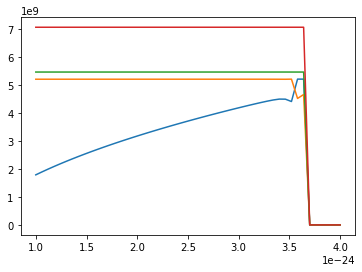

In [506]:
plt.plot(EJs, omegas)

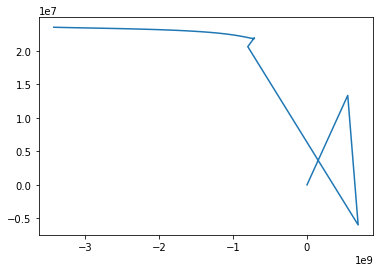

In [507]:
plt.plot(omegas[:, 0]-omegas[:, 1], kerrs[:, 1, 2])
#plt.plot(omegas[:, 0]-omegas[:, 1], kerrs[:, 0, 1])
#plt.ylim([-5e6, 5e6])

# rubbish

In [10]:
H, basis = tls.get_perturbation_hamiltonian([0,1], [3,3])
H.shape

(9, 9)

In [10]:
np.sum(np.abs(H-np.conj(H).T))/np.sum(np.abs(H))

NameError: name 'H' is not defined

In [12]:
energies, vecs = np.linalg.eigh(H)

In [13]:
energies

array([-1.51443087e+08,  4.83785629e+09,  5.03079668e+09,  9.54267206e+09,
        9.92003743e+09,  1.00262244e+10,  1.47119059e+10,  1.49046753e+10,
        1.95960233e+10])

In [21]:
np.round(np.abs(vecs[1,:]),2)

array([0.  , 0.01, 1.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ])

In [22]:
np.conj(vecs[:,1])@H@vecs[:,1]

(4837856288.900802-6.938893903907228e-18j)

In [ ]:
omega

In [ ]:
kerr

In [ ]:
e